In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import *

from functionsSqueeze import w, wdot, H, getParams


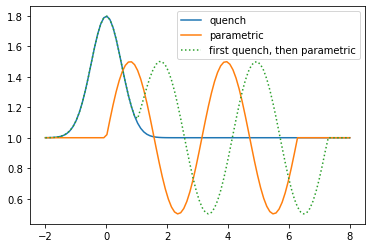

In [2]:
# plot different frequency modulations
tlist = np.linspace(-2,8,100)
wQuench = w(tlist, w0=1, dwQ=1, dtQ=0.5)
wQuenchD = wdot(tlist, w0=1, dwQ=1, dtQ=0.5)
wParam = w(tlist, w0=1, dwP=0.5, dtP=4*np.pi/2)
wBoth = w(tlist, w0=1, dwQ=1, dtQ=0.5, dwP=0.5, dtP=4*np.pi/2, delay=1)

plt.plot(tlist, wQuench, label="quench")
# plt.plot(tlist, wQuenchD, label="quench diff")
plt.plot(tlist, wParam, label="parametric")
plt.plot(tlist, wBoth,":", label="first quench, then parametric")
plt.legend()

In [3]:
n = 50
psi0 = thermal_dm(n,0.1)

argsQ = {'a1': 1,
       'a2': 1,
       'a3': 0.2,
       'a4': 0,
       'a5': 0,
       'a6': 0,
       'n': n,
       'omega': w,
       'omegaDt': wdot}

argsP = {'a1': 1,
       'a2': 0,
       'a3': 0.1,
       'a4': 0.5,
       'a5': 4*np.pi/2,
       'a6': 0,
       'n': n,
       'omega': w,
       'omegaDt': wdot}

argsQP = {'a1': 1,
       'a2': 1,
       'a3': 0.5,
       'a4': 0.5,
       'a5': 4*np.pi/2,
       'a6': 1,
       'n': n,
       'omega': w,
       'omegaDt': wdot}

In [4]:
timesQ = np.linspace(-2,5,300)
resultQ = mesolve(H, psi0, timesQ, args=argsQ)

In [5]:
timesP = np.linspace(-1,10,400)
resultP = mesolve(H, psi0, timesP, args=argsP)

In [6]:
timesQP = np.linspace(-2,12,600)
resultQP = mesolve(H, psi0, timesQP, args=argsQP)

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00EAB590>,
       dtype=object))

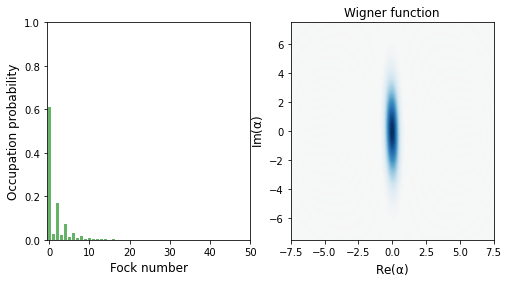

In [11]:
result = resultQ

psi = result.states[-1]

plot_wigner_fock_distribution(psi)

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x010EDB90>,
       dtype=object))

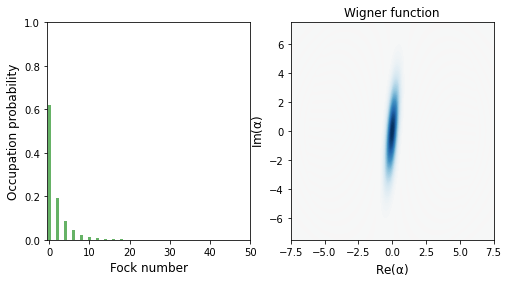

In [12]:
alpha, xi, nBar, nCS, nT = getParams(psi)

# print('alpha=', alpha, ', xi =', xi, ', nBar =', nBar, ', nCS =', nCS, ', nT =', nT)

psi1 = displace(n, alpha)*squeeze(n, xi)*thermal_dm(n, nT)*squeeze(n, xi).dag()*displace(n, alpha).dag()
plot_wigner_fock_distribution(psi1)

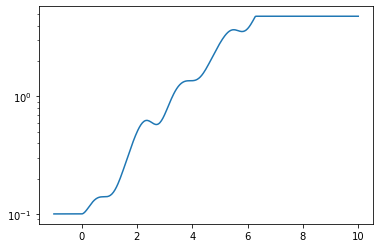

In [46]:
result = resultP
times = timesP

# alphaL, xiL, nBarL, nCSL, nTL = getParams(result.states)

# varX = expect(x*x.dag(), result.states)
# varP = expect(p*p.dag(), result.states)
# plt.plot(times, alphaL, label = "variance of x")
# plt.plot(times, varP, label = "variance of p")
masterList = [[],[],[],[],[]]
for psi in result.states:
    alpha, xi, nBar, nCS, nT = getParams(psi)
    masterList[0].append(alpha)
    masterList[1].append(np.abs(xi))
    masterList[2].append(nBar)
    masterList[3].append(nCS)
    masterList[4].append(nT)
    
plt.semilogy(times, masterList[2], label = "variance of x")

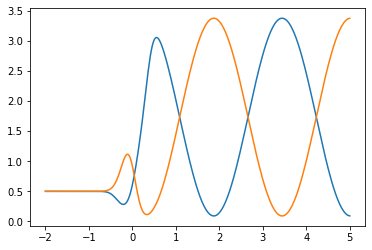

In [8]:
# dimensionless position and momentum operators
ad = create(n)
a = destroy(n)
x = 1/np.sqrt(2)*(ad + a)
p = 1/np.sqrt(2)*(ad - a)

# plot variance of x and p with time
varX = expect(x*x.dag(), resultQ.states)
varP = expect(p*p.dag(), resultQ.states)
plt.plot(timesQ, varX, label = "variance of x")
plt.plot(timesQ, varP, label = "variance of p")

In [40]:
np.exp(1j*2)

(-0.4161468365471424+0.9092974268256817j)

alpha= 0j xi = (-0.48302822691380687+1.6088081781136176j) , nBar = 6.755382149551848 , nCS = (6.702473503731339+0j) , nT = 0.05290864582050947


(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0FC8EC70>,
       dtype=object))

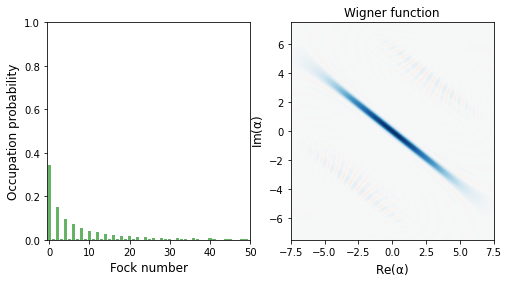

In [8]:
# dimensionless position and momentum operators
n = 50
ad = create(n)
a = destroy(n)
x = (ad + a)
p = 1j*(ad - a)

xV = variance(x, psi)
pV = variance(p, psi)

xiR = np.arcsinh(0.5*np.sqrt(xV + pV - 2 +0j))
xiT1 = 0.25*(pV - xV)/(np.cosh(xiR)*np.sinh(xiR))
xiT = -np.sign(xiT1)*np.arccos(xiT1)
xi = xiR*np.exp(1j*xiT)
# alpha = 0.5*np.sqrt(xV + pV)
alpha = expect(a, psi)
nCS = np.abs(alpha)**2 + np.sinh(xiR)**2
nT = np.abs(expect(ad*a, psi) - nCS)


print('alpha=', alpha, 'xi =', xi, ', nBar =', expect(ad*a, psi),', nCS =', nCS, ', nT =', nT)


psi1 = displace(n, alpha)*squeeze(n, xi)*thermal_dm(n, nT)*squeeze(n, xi).dag()*displace(n, alpha).dag()
plot_wigner_fock_distribution(psi1)